In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

In [8]:
apple = pd.read_csv("(질의1)3250_Assignment+3_aapl.csv")
amzn = pd.read_csv("(질의1)3250_Assignment+3_amzn.csv")
ebay = pd.read_csv("(질의1)3250_Assignment+3_ebay.csv")
intc = pd.read_csv("(질의1)3250_Assignment+3_INTC.csv")


In [15]:
apple.sort_values(['Date'], inplace=True)
apple.reset_index(drop=True, inplace=True)

amzn.sort_values(['Date'], inplace=True)
amzn.reset_index(drop=True, inplace=True)

ebay.sort_values(['Date'], inplace=True)
ebay.reset_index(drop=True, inplace=True)

intc.sort_values(['Date'], inplace=True)
intc.reset_index(drop=True, inplace=True)

intc

Date   Open    High     Low  Close      Volume  ExDividend  \
0     2013-02-28  20.91  21.080  20.820  20.88  34808000.0         0.0   
1     2013-03-01  20.79  21.190  20.660  21.03  45695700.0         0.0   
2     2013-03-04  21.16  21.290  20.960  21.27  47545800.0         0.0   
3     2013-03-05  21.34  21.590  21.300  21.51  38796400.0         0.0   
4     2013-03-06  21.53  21.785  21.510  21.75  37188900.0         0.0   
...          ...    ...     ...     ...    ...         ...         ...   
1253  2018-02-22  46.14  46.560  45.620  45.80  16447235.0         0.0   
1254  2018-02-23  46.34  47.790  46.305  47.73  25243762.0         0.0   
1255  2018-02-26  48.20  49.130  48.100  49.11  25774143.0         0.0   
1256  2018-02-27  49.37  50.900  49.310  49.91  42654658.0         0.0   
1257  2018-02-28  50.18  50.340  49.280  49.29  33888511.0         0.0   

      SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   AdjVolume  
0            1.0  17.891516  18.036975  17.814508  17.865846  34808000.0  
1            1.0  17.788838  18.131096  17.677605  17.994193  45695700.0  
2            1.0  18.105427  18.216660  17.934298  18.199548  47545800.0  
3            1.0  18.259443  18.473354  18.225217  18.404902  38796400.0  
4            1.0  18.422015  18.640204  18.404902  18.610257  37188900.0  
...          ...        ...        ...        ...        ...         ...  
1253         1.0  46.140000  46.560000  45.620000  45.800000  16447235.0  
1254         1.0  46.340000  47.790000  46.305000  47.730000  25243762.0  
1255         1.0  48.200000  49.130000  48.100000  49.110000  25774143.0  
1256         1.0  49.370000  50.900000  49.310000  49.910000  42654658.0  
1257         1.0  50.180000  50.340000  49.280000  49.290000  33888511.0  

[1258 rows x 13 columns]

In [17]:
apple.Date = pd.to_datetime(apple.Date)
amzn.Date = pd.to_datetime(amzn.Date)
ebay.Date = pd.to_datetime(ebay.Date)
intc.Date = pd.to_datetime(intc.Date)

In [20]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

apple["Year-Month"] = apple["Date"].apply(concatenate_year_month)
amzn["Year-Month"] = amzn["Date"].apply(concatenate_year_month)
ebay["Year-Month"] = ebay["Date"].apply(concatenate_year_month)
intc["Year-Month"] = intc["Date"].apply(concatenate_year_month)

In [21]:
def mk_close(data_in):
    return pd.DataFrame([data_in[data_in['Year-Month']==u].iloc[-1,:].values for u in data_in['Year-Month'].unique()], columns=data_in.columns)

month_close = mk_close(apple)
month_close_z = mk_close(amzn)
month_close_e = mk_close(ebay)
month_close_i = mk_close(intc)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

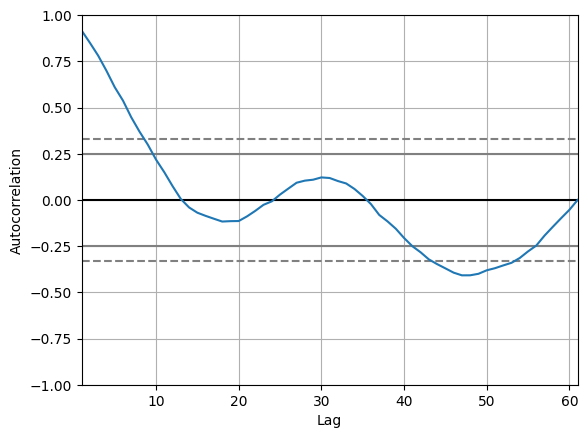

In [22]:
autocorrelation_plot(month_close.Close)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

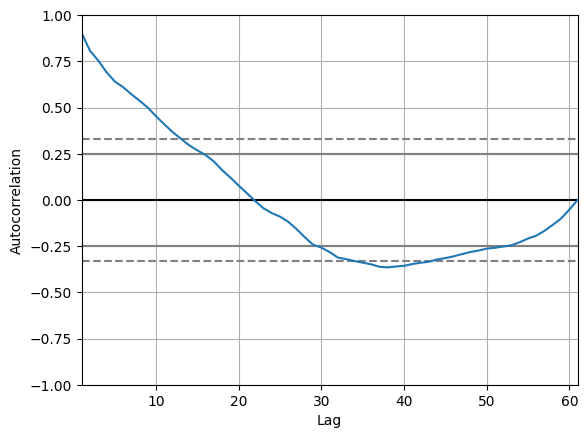

In [23]:
autocorrelation_plot(month_close_z.Close)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

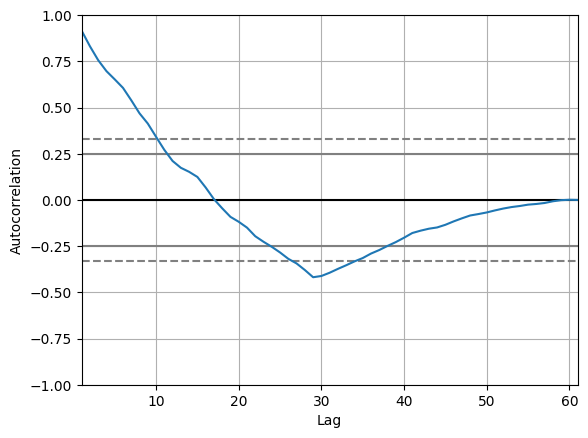

In [24]:
autocorrelation_plot(month_close_e.Close)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

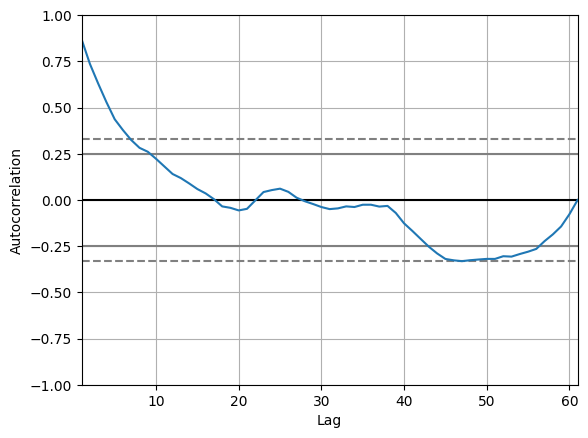

In [25]:
autocorrelation_plot(month_close_i.Close)

In [34]:
def shift_trick(data_in):
    data_c = data_in.copy()
    data_c['previous_close'] = data_c.shift(1).Close
    data_c['gain(%)'] = (data_c['Close'] - data_c['previous_close']) / data_c['previous_close'] * 100.0

    return data_c

apple_shift = shift_trick(data_in=apple)
amzn_shift = shift_trick(data_in=amzn)
ebay_shift = shift_trick(data_in=ebay)
intc_shift = shift_trick(data_in=intc)

In [41]:
def mk_month_gain(data_in):
    return pd.DataFrame([data_in[data_in['Year-Month']==u]['gain(%)'].sum() for u in data_in['Year-Month'].unique()],columns=['month_gain'],index=data_in['Year-Month'].unique())

apple_m_g = mk_month_gain(data_in=apple_shift)
amzn_m_g = mk_month_gain(data_in=amzn_shift)
ebay_m_g = mk_month_gain(data_in=ebay_shift)
intc_m_g = mk_month_gain(data_in=intc_shift)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

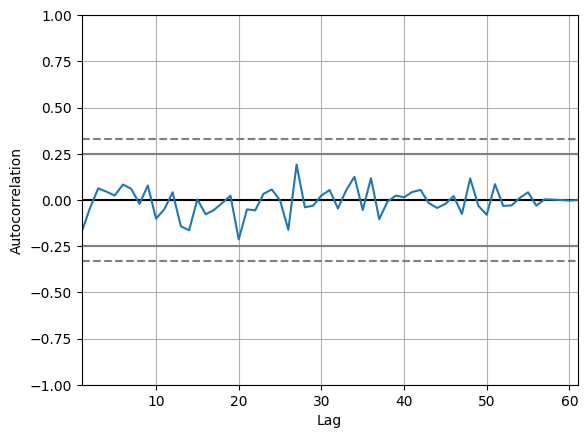

In [43]:
autocorrelation_plot(apple_m_g)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

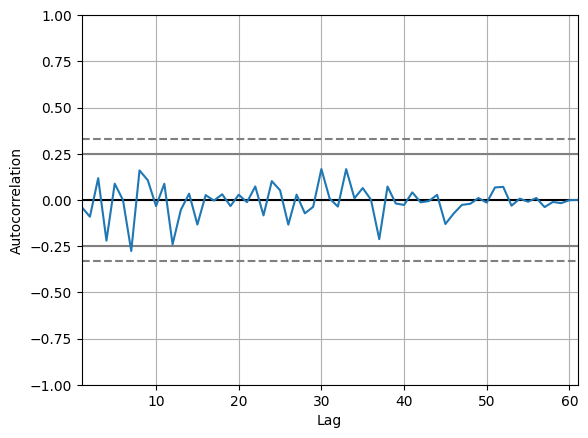

In [44]:
autocorrelation_plot(amzn_m_g)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

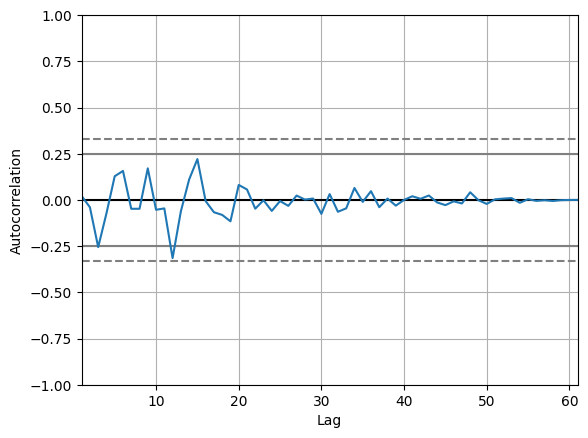

In [45]:
autocorrelation_plot(ebay_m_g)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

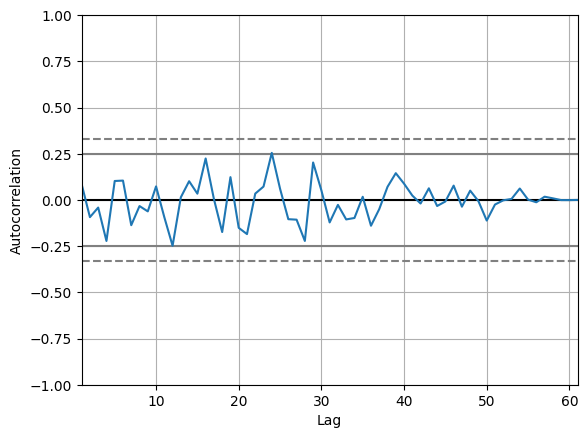

In [46]:
autocorrelation_plot(intc_m_g)